In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pingouin as pg 

In [7]:
outcomes = pd.read_csv('../../DerivedData/Bayley.csv', sep=';')

### group(PT_FT) == control term: labels 0: control 1: preterm
### Groups3GA == control, extreme, moderate: labels 1: extreme preterm 2: moderate preterm 3: control


In [8]:
def get_notation(pvals): 
    notation = []
    for value in pvals:
        if value < 0.001:
            notation.append('{}\n***'.format(np.round(value,2)))
        elif 0.001 <= value < 0.01:
            notation.append('{}\n**'.format(np.round(value,2)))
        elif 0.01 <= value < 0.05:
            notation.append('{}\n*'.format(np.round(value,2)))
        else:
            notation.append('{}\nns'.format(np.round(value,2)))
    return np.array(notation) 


In [9]:
# preterm group == chocolate
# term group == darkmagenta

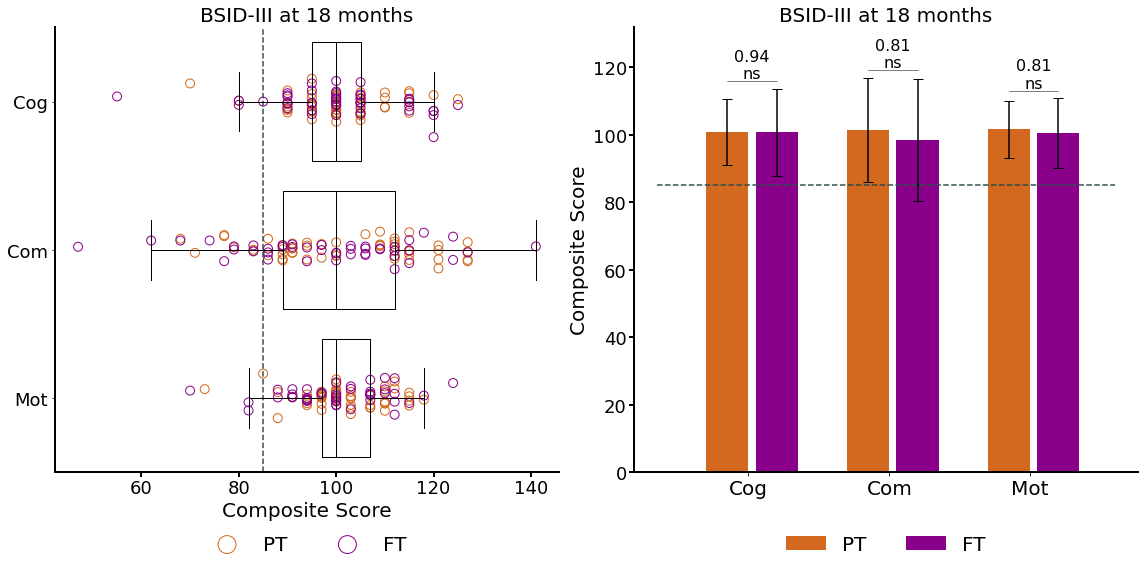

In [10]:
#sns.set_style('white')
#sns.set_context('paper')
fig, axs = plt.subplots(1,2, figsize=(16,8))

#### subplot 1 is a box plot 

#for i, composite in enumerate(['Cognitive_CompositeS', 'Communication_CompositeS', 'Motor_CompositeS']):
    
for i, composite in enumerate([ 'Motor_CompositeS','Communication_CompositeS', 'Cognitive_CompositeS']):
        
    
    axs[0].boxplot(outcomes[composite].values, positions=[i],
                vert=False, widths = 0.8, showfliers=False,
                  medianprops = dict(color = 'black'))

    for g in ['preterm group', 'control group']:
        if g == 'preterm group':
            group_name = 'PT'
            label = 0
            color = 'chocolate'
        else:
            group_name = 'FT'
            label = 1
            color = 'darkmagenta'
            
        ix = outcomes[outcomes['Group(PT_FT)'] == label][composite].values
        y = np.random.normal(i, 0.06, size=len(ix))
        
        if i == 0:
            axs[0].scatter( ix, y, marker= 'o', s=80,
                    facecolors='none', edgecolors = color,
                    label = group_name)
        else: 
            axs[0].scatter( ix, y, marker= 'o', s=80,
                    facecolors='none', edgecolors = color)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=20, frameon=False, markerscale=2)

axs[0].set_yticks([0,1,2])
#axs[0].set_yticklabels(['Cog', 'Com', 'Mot'], fontsize=18)
axs[0].set_yticklabels(['Mot', 'Com', 'Cog'], fontsize=18)

axs[0].set_xlabel('Composite Score', fontsize=20)
axs[0].set_title('BSID-III at 18 months', fontsize=20)

axs[0].vlines( 85, -0.5, 2.5, color='darkslategray', linestyles='dashed')
axs[1].hlines( 85, -0.5, 2.75, color='darkslategray', linestyles='dashed')

# Hide the right and top spines
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs[0].spines[axis].set_linewidth(2)

axs[0].tick_params(axis='x', labelsize=18)    
plt.setp(axs[0].xaxis.get_ticklines(), 'markeredgewidth', 2)
plt.setp(axs[0].xaxis.get_ticklines(), 'markersize', 5)

### subplot 2 is a bar plot comparing the groups 

pvals = []
max_h = []
#for i, composite in enumerate(['Motor_CompositeS', 'Communication_CompositeS', 'Cognitive_CompositeS', ]):
for i, composite in enumerate(['Cognitive_CompositeS', 'Communication_CompositeS', 'Motor_CompositeS']):
    if i == 0:
        # preterm         
        ix = outcomes[outcomes['Group(PT_FT)'] == 0][composite].values
        std = np.std(ix)
        axs[1].bar(x = i, height = np.mean(ix), width=0.3, yerr=std, capsize=5,
                   color='chocolate', label = 'PT')
        # control 
        ix2 = outcomes[outcomes['Group(PT_FT)'] == 1][composite].values
        std2 = np.std(ix2)
        axs[1].bar(x = i+0.35, height =  np.mean(ix2),width=0.3, yerr=std2, capsize=5,
                   color='darkmagenta', label = 'FT')
        
        test = pg.ttest(ix, ix2)
        p = np.round(np.float32(test['p-val'].values[0]),2)
        pvals.append(p)
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
    else: 
        # preterm         
        ix = outcomes[outcomes['Group(PT_FT)'] == 0][composite].values
        std = np.std(ix)
        axs[1].bar(x = i, height =  np.mean(ix), width=0.3, yerr=std, capsize=5,
                   color='chocolate')
        # control 
        ix2 = outcomes[outcomes['Group(PT_FT)'] == 1][composite].values
        std2 = np.std(ix2)
        axs[1].bar(x = i+0.35, height =  np.mean(ix2),width=0.3, yerr=std2, capsize=5,
                   color='darkmagenta')
 
        test = pg.ttest(ix, ix2)
        p = np.round(np.float32(test['p-val'].values[0]),2)
        pvals.append(p)
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
#axs[1].autoscale(tight=True)

axs[1].set_xticks(np.array(range(3))+.15)
#axs[1].set_xticklabels( ('Mot', 'Com', 'Cog'), fontsize=20 )
axs[1].set_xticklabels(('Cog', 'Com', 'Mot'), fontsize=20)
axs[1].set_ylabel('Composite Score', fontsize=20)

a, pvals_corr= pg.multicomp(pvals, method='fdr_bh')
notation = get_notation(pvals=pvals_corr)
for i, txt in enumerate(notation):
    x1,x2 =  i, i+0.35          
    y, h, col = max_h[i] * 1.02 , 0.0001, 'k'
    axs[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    axs[1].text((x1+x2)*.5, y+h, txt, fontsize=16,
                ha='center', va='bottom', color=col)
    

# Hide the right and top spines
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs[1].spines[axis].set_linewidth(2)

axs[1].tick_params(axis='y', labelsize=18)    
plt.setp(axs[1].yaxis.get_ticklines(), 'markeredgewidth', 2)
plt.setp(axs[1].yaxis.get_ticklines(), 'markersize', 5)
axs[1].set_title('BSID-III at 18 months', fontsize=20)

axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=20, frameon=False, markerscale=0.8)
axs[1].set_ylim([0,max(max_h)+15])

plt.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig('../../Results/figures/Bayley_distribution_composite_preterm_term_new.png', dpi=300)
plt.show()

In [11]:
def get_notation(pvals): 
    notation = []
    for value in pvals:
        if value < 0.001:
            notation.append('{}\n***'.format(np.round(value,2)))
        elif 0.001 <= value < 0.01:
            notation.append('{}\n**'.format(np.round(value,2)))
        elif 0.01 <= value < 0.05:
            notation.append('{}\n*'.format(np.round(value,2)))
        else:
            notation.append('{}\nns'.format(np.round(value,2)))
    return np.array(notation) 


In [12]:
outcomes.columns

Index(['ParticipantID', 'Group(PT_FT)', 'GAgroups4', 'Groups3GA',
       'CorrectedAge', 'Cognitive_ScaledS', 'ReceptiveCom_ScaledS',
       'ExpressiveCom_ScaledS', 'FineMot_ScaledS', 'GrossMot_ScaledS',
       'Cognitive_CompositeS', 'Communication_CompositeS', 'Motor_CompositeS'],
      dtype='object')

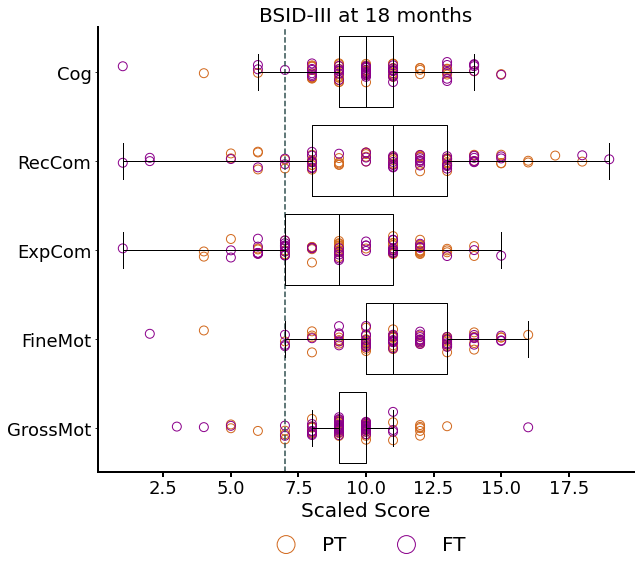

In [14]:
#sns.set_style('white')
#sns.set_context('paper')
fig, axs = plt.subplots(1,1, figsize=(9,8))

#### subplot 1 is a box plot 

#for i, composite in enumerate(['Cognitive_ScaledS', 'ReceptiveCom_ScaledS', 'ExpressiveCom_ScaledS', 'FineMot_ScaledS','GrossMot_ScaledS' ]):
 
for i,composite in enumerate(['GrossMot_ScaledS', 'FineMot_ScaledS','ExpressiveCom_ScaledS', 'ReceptiveCom_ScaledS','Cognitive_ScaledS']):  
    
    axs.boxplot(outcomes[composite].values, positions=[i],
                vert=False, widths = 0.8, showfliers=False,
                  medianprops = dict(color = 'black'))

    for g in ['preterm group', 'control group']:
        if g == 'preterm group':
            group_name='PT'
            label = 0
            color = 'chocolate'
        else:
            group_name='FT'
            label = 1
            color = 'darkmagenta'
            
        ix = outcomes[outcomes['Group(PT_FT)'] == label][composite].values
        y = np.random.normal(i, 0.06, size=len(ix))
        
        if i == 0:
            axs.scatter( ix, y, marker= 'o', s=80,
                    facecolors='none', edgecolors = color,
                    label = group_name)
        else: 
            axs.scatter( ix, y, marker= 'o', s=80,
                    facecolors='none', edgecolors = color)
axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=20, frameon=False, markerscale=2)

axs.set_yticks([0,1,2,3,4])
#axs[0].set_yticklabels(['Cognitive', 'Receptive Com.', 'Expressive Com.', 'Fine Motor', 'Gross Motor'], fontsize=18)
axs.set_yticklabels(['GrossMot', 'FineMot', 'ExpCom', 'RecCom', 'Cog'], fontsize=18)

axs.set_xlabel('Scaled Score', fontsize=20)
axs.set_title('BSID-III at 18 months', fontsize=20)

# Hide the right and top spines
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs.spines[axis].set_linewidth(2)

axs.tick_params(axis='x', labelsize=18)    
plt.setp(axs.xaxis.get_ticklines(), 'markeredgewidth', 2)
plt.setp(axs.xaxis.get_ticklines(), 'markersize', 5)


axs.vlines( 7, -0.5, 4.5, color='darkslategray', linestyles='dashed')
#axs[1].hlines( 7, -0.5, 4.75, color='darkslategray', linestyles='dashed')


plt.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig('../../Results/figures/Bayley_distribution_scaled_preterm_term_OHBM.png', dpi=300)
plt.show()

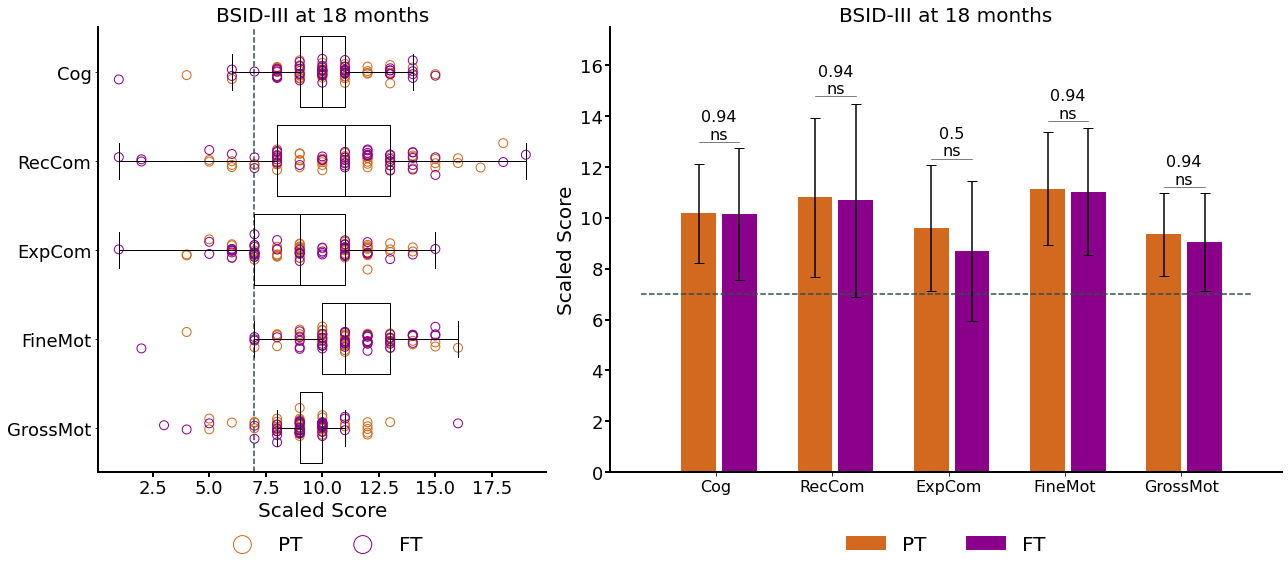

In [85]:
#sns.set_style('white')
#sns.set_context('paper')
fig, axs = plt.subplots(1,2, figsize=(18,8), gridspec_kw={'width_ratios': [2, 3]})

#### subplot 1 is a box plot 

#for i, composite in enumerate(['Cognitive_ScaledS', 'ReceptiveCom_ScaledS', 'ExpressiveCom_ScaledS', 'FineMot_ScaledS','GrossMot_ScaledS' ]):
 
for i,composite in enumerate(['GrossMot_ScaledS', 'FineMot_ScaledS','ExpressiveCom_ScaledS', 'ReceptiveCom_ScaledS','Cognitive_ScaledS']):  
    
    axs[0].boxplot(outcomes[composite].values, positions=[i],
                vert=False, widths = 0.8, showfliers=False,
                  medianprops = dict(color = 'black'))

    for g in ['preterm group', 'control group']:
        if g == 'preterm group':
            group_name='PT'
            label = 0
            color = 'chocolate'
        else:
            group_name='FT'
            label = 1
            color = 'darkmagenta'
            
        ix = outcomes[outcomes['Group(PT_FT)'] == label][composite].values
        y = np.random.normal(i, 0.06, size=len(ix))
        
        if i == 0:
            axs[0].scatter( ix, y, marker= 'o', s=80,
                    facecolors='none', edgecolors = color,
                    label = group_name)
        else: 
            axs[0].scatter( ix, y, marker= 'o', s=80,
                    facecolors='none', edgecolors = color)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=20, frameon=False, markerscale=2)

axs[0].set_yticks([0,1,2,3,4])
#axs[0].set_yticklabels(['Cognitive', 'Receptive Com.', 'Expressive Com.', 'Fine Motor', 'Gross Motor'], fontsize=18)
axs[0].set_yticklabels(['GrossMot', 'FineMot', 'ExpCom', 'RecCom', 'Cog'], fontsize=18)

axs[0].set_xlabel('Scaled Score', fontsize=20)
axs[0].set_title('BSID-III at 18 months', fontsize=20)

# Hide the right and top spines
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs[0].spines[axis].set_linewidth(2)

axs[0].tick_params(axis='x', labelsize=18)    
plt.setp(axs[0].xaxis.get_ticklines(), 'markeredgewidth', 2)
plt.setp(axs[0].xaxis.get_ticklines(), 'markersize', 5)


axs[0].vlines( 7, -0.5, 4.5, color='darkslategray', linestyles='dashed')
axs[1].hlines( 7, -0.5, 4.75, color='darkslategray', linestyles='dashed')

### subplot 2 is a bar plot comparing the groups 

pvals = []
max_h = []
#for i, composite in enumerate(['Cognitive_ScaledS', 'ReceptiveCom_ScaledS', 'ExpressiveCom_ScaledS', 'FineMot_ScaledS','GrossMot_ScaledS' ][::-1]):

for i, composite in enumerate(['Cognitive_ScaledS', 'ReceptiveCom_ScaledS', 'ExpressiveCom_ScaledS', 'FineMot_ScaledS','GrossMot_ScaledS' ]):

  
   
    
    if i == 0:
        # preterm         
        ix = outcomes[outcomes['Group(PT_FT)'] == 0][composite].values
        std = np.std(ix)
        axs[1].bar(x = i, height = np.mean(ix), width=0.3, yerr=std, capsize=5,
                   color='chocolate', label = 'PT')
        # control 
        ix2 = outcomes[outcomes['Group(PT_FT)'] == 1][composite].values
        std2 = np.std(ix2)
        axs[1].bar(x = i+0.35, height =  np.mean(ix2),width=0.3, yerr=std2, capsize=5,
                   color='darkmagenta', label = 'FT')
        
        test = pg.ttest(ix, ix2)
        p = np.round(np.float32(test['p-val'].values[0]),2)
        pvals.append(p)
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
    else: 
        # preterm         
        ix = outcomes[outcomes['Group(PT_FT)'] == 0][composite].values
        std = np.std(ix)
        axs[1].bar(x = i, height =  np.mean(ix), width=0.3, yerr=std, capsize=5,
                   color='chocolate')
        # control 
        ix2 = outcomes[outcomes['Group(PT_FT)'] == 1][composite].values
        std2 = np.std(ix2)
        axs[1].bar(x = i+0.35, height =  np.mean(ix2),width=0.3, yerr=std2, capsize=5,
                   color='darkmagenta')
 
        test = pg.ttest(ix, ix2)
        p = np.round(np.float32(test['p-val'].values[0]),2)
        pvals.append(p)
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
#axs[1].autoscale(tight=True)

axs[1].set_xticks(np.array(range(5))+.15)
#axs[1].set_xticklabels( list(['Cognitive', 'Recep. Com.', 'Express. Com.', 'Fine Motor', 'Gross Motor'][::-1]), fontsize=16)#, rotation=45 )
axs[1].set_xticklabels( list(['Cog', 'RecCom', 'ExpCom', 'FineMot', 'GrossMot']), fontsize=16)#, rotation=45 )
axs[1].set_ylabel('Scaled Score', fontsize=20)

a, pvals_corr= pg.multicomp(pvals, method='fdr_bh')
notation = get_notation(pvals=pvals_corr)
for i, txt in enumerate(notation):
    x1,x2 =  i, i+0.35          
    y, h, col = max_h[i] * 1.02 , 0.0001, 'k'
    axs[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    axs[1].text((x1+x2)*.5, y+h, txt, fontsize=16,
                ha='center', va='bottom', color=col)
    

# Hide the right and top spines
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs[1].spines[axis].set_linewidth(2)

axs[1].tick_params(axis='y', labelsize=18)    
plt.setp(axs[1].yaxis.get_ticklines(), 'markeredgewidth', 2)
plt.setp(axs[1].yaxis.get_ticklines(), 'markersize', 5)
axs[1].set_title('BSID-III at 18 months', fontsize=20)

axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=20, frameon=False, markerscale=0.8)
axs[1].set_ylim([0,max(max_h)+3])

plt.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig('../../Results/figures/Bayley_distribution_scaled_preterm_term_new.png', dpi=300)
plt.show()

# subgroups 

In [6]:
from scipy.stats import f_oneway, tukeylambda


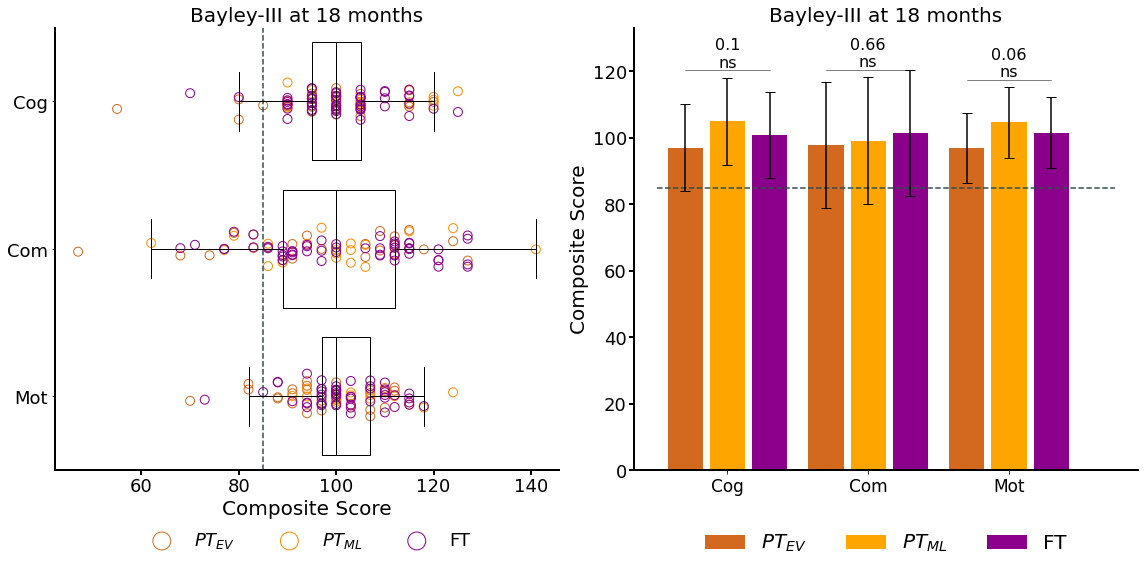

In [58]:
#sns.set_style('white')
#sns.set_context('paper')
fig, axs = plt.subplots(1,2, figsize=(16,8))

### Groups3GA == control, extreme, moderate: labels 1: extreme preterm 2: moderate preterm 3: control
#### subplot 1 is a box plot 

for i, composite in enumerate(['Cognitive_CompositeS', 'Communication_CompositeS', 'Motor_CompositeS'][::-1]):
    axs[0].boxplot(outcomes[composite].values, positions=[i],
                vert=False, widths = 0.8, showfliers=False,
                  medianprops = dict(color = 'black'))

    for g in ['extreme', 'moderate', 'control']:
        if g == 'extreme':
            label = 1
            color = 'chocolate'
            group_name = '$PT_{EV}$'
        elif g == 'moderate':
            label = 2
            color= 'darkorange'    
            group_name = '$PT_{ML}$'
        else:
            label = 3
            color = 'darkmagenta'
            group_name = 'FT'
            
        ix = outcomes[outcomes['Groups3GA'] == label][composite].values
        y = np.random.normal(i, 0.06, size=len(ix))
        
        if i == 0:
            axs[0].scatter( ix, y, marker= 'o', s=80,
                    facecolors='none', edgecolors = color,
                    label = group_name)
        else: 
            axs[0].scatter( ix, y, marker= 'o', s=80,
                    facecolors='none', edgecolors = color)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 3, fontsize=18, frameon=False, markerscale=2)

axs[0].set_yticks([0,1,2])
axs[0].set_yticklabels(['Cog', 'Com', 'Mot'][::-1], fontsize=18)


axs[0].set_xlabel('Composite Score', fontsize=20)
axs[0].set_title('Bayley-III at 18 months', fontsize=20)

# Hide the right and top spines
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs[0].spines[axis].set_linewidth(2)

axs[0].tick_params(axis='x', labelsize=18)    
plt.setp(axs[0].xaxis.get_ticklines(), 'markeredgewidth', 2)
plt.setp(axs[0].xaxis.get_ticklines(), 'markersize', 5)

axs[0].vlines( 85, -0.5, 2.5, color='darkslategray', linestyles='dashed')
axs[1].hlines( 85, -0.5, 2.75, color='darkslategray', linestyles='dashed')

### subplot 2 is a bar plot comparing the groups 

pvals = []
max_h = []
for i, composite in enumerate(['Motor_CompositeS', 'Communication_CompositeS', 'Cognitive_CompositeS' ][::-1]):

    if i == 0:
        # extreme        
        ix = outcomes[outcomes['Groups3GA'] == 1][composite].values
        std = np.std(ix)
        axs[1].bar(x = i-0.3, height = np.mean(ix), width=0.25, yerr=std, capsize=5,
                   color='chocolate', label = '$PT_{EV}$')
        
        # moderate       
        ix2 = outcomes[outcomes['Groups3GA'] == 2][composite].values
        std2 = np.std(ix)
        axs[1].bar(x = i, height = np.mean(ix2), width=0.25, yerr=std2, capsize=5,
                   color='orange', label = '$PT_{ML}$')
        
        
        # control 
        ix3 = outcomes[outcomes['Groups3GA'] == 3][composite].values
        std3 = np.std(ix3)
        axs[1].bar(x = i+0.3, height =  np.mean(ix3),width=0.25, yerr=std2, capsize=5,
                   color='darkmagenta', label = 'FT')
        
        sc_test = f_oneway(ix, ix2, ix3)
        pvals.append(sc_test.pvalue)
        #if sc_test.pvalue < 0.05:

        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
    else: 
         # extreme        
        ix = outcomes[outcomes['Groups3GA'] == 1][composite].values
        std = np.std(ix)
        axs[1].bar(x = i-0.3, height = np.mean(ix), width=0.25, yerr=std, capsize=5,
                   color='chocolate')
        
        # moderate       
        ix2 = outcomes[outcomes['Groups3GA'] == 2][composite].values
        std2 = np.std(ix)
        axs[1].bar(x = i, height = np.mean(ix2), width=0.25, yerr=std2, capsize=5,
                   color='orange')
        
        # control 
        ix3 = outcomes[outcomes['Groups3GA'] == 3][composite].values
        std3 = np.std(ix3)
        axs[1].bar(x = i+0.3, height =  np.mean(ix3),width=0.25, yerr=std2, capsize=5,
                   color='darkmagenta')
 
        sc_test = f_oneway(ix, ix2, ix3)
        pvals.append(sc_test.pvalue)
        #if sc_test.pvalue < 0.05:
            
            
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
#axs[1].autoscale(tight=True)

axs[1].set_xticks(np.array(range(3)))
#axs[1].set_xticklabels( ('Motor', 'Communication', 'Cognitive'), fontsize=17 )
axs[1].set_xticklabels( ('Cog', 'Com', 'Mot'), fontsize=17 )
axs[1].set_ylabel('Composite Score', fontsize=20)

a, pvals_corr= pg.multicomp(pvals, method='fdr_bh')
notation = get_notation(pvals=pvals_corr)
for i, txt in enumerate(notation):
    x1,x2 =  i-0.3, i+0.3          
    y, h, col = max_h[i] * 1.02 , 0.0001, 'k'
    axs[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    axs[1].text((x1+x2)*.5, y+h, txt, fontsize=16,
                ha='center', va='bottom', color=col)
    

# Hide the right and top spines
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs[1].spines[axis].set_linewidth(2)

axs[1].tick_params(axis='y', labelsize=18)    
plt.setp(axs[1].yaxis.get_ticklines(), 'markeredgewidth', 2)
plt.setp(axs[1].yaxis.get_ticklines(), 'markersize', 5)
axs[1].set_title('Bayley-III at 18 months', fontsize=20)

axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 3, fontsize=20, frameon=False, markerscale=0.8)
axs[1].set_ylim([0,max(max_h)+15])

plt.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig('../../Results/figures/Bayley_distribution_composite_subgroups_new.png', dpi=300)
plt.show()

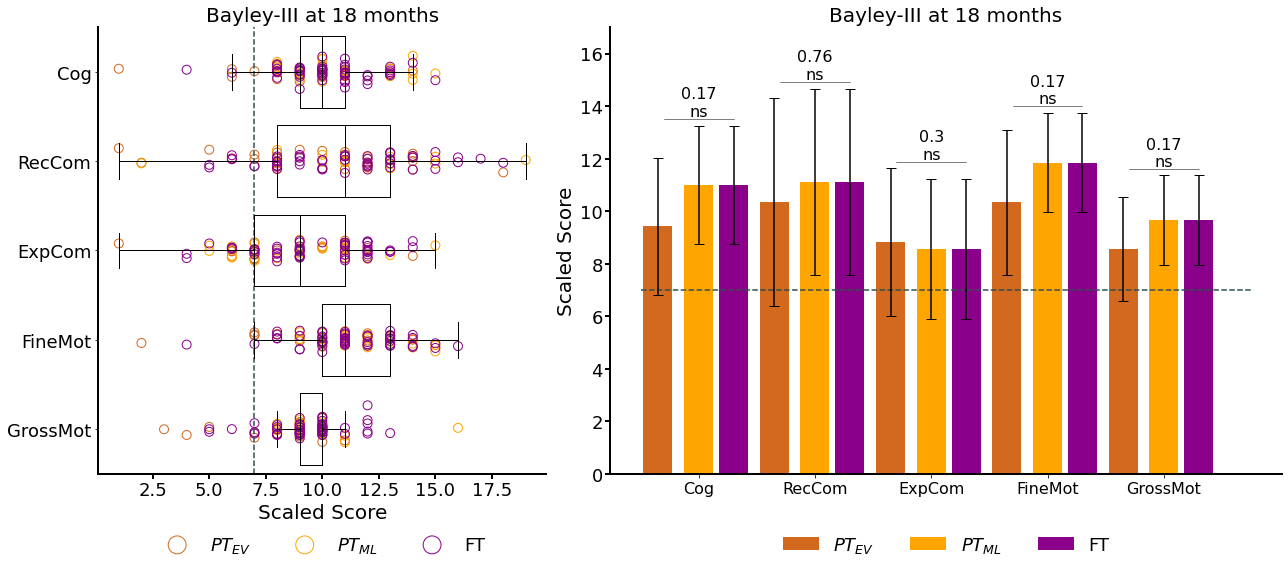

In [64]:
#sns.set_style('white')
#sns.set_context('paper')
fig, axs = plt.subplots(1,2, figsize=(18,8), gridspec_kw={'width_ratios': [2, 3]})

#### subplot 1 is a box plot 

#for i, composite in enumerate(['Cognitive_ScaledS', 'ReceptiveCom_ScaledS', 'ExpressiveCom_ScaledS', 'FineMot_ScaledS','GrossMot_ScaledS' ]):
for i, composite in enumerate(['Cognitive_ScaledS', 'ReceptiveCom_ScaledS', 'ExpressiveCom_ScaledS', 'FineMot_ScaledS','GrossMot_ScaledS' ][::-1]):
 
    axs[0].boxplot(outcomes[composite].values, positions=[i],
                vert=False, widths = 0.8, showfliers=False,
                  medianprops = dict(color = 'black'))

    for g in ['extreme', 'moderate', 'control']:
        if g == 'extreme':
            label = 1
            color = 'chocolate'
            group_name = '$PT_{EV}$'
        elif g == 'moderate':
            label = 2
            color= 'orange' 
            group_name = '$PT_{ML}$'
        else:
            label = 3
            color = 'darkmagenta'
            group_name= 'FT'
            
        ix = outcomes[outcomes['Groups3GA'] == label][composite].values
        y = np.random.normal(i, 0.06, size=len(ix))
        
        if i == 0:
            axs[0].scatter( ix, y, marker= 'o', s=80,
                    facecolors='none', edgecolors = color,
                    label = group_name)
        else: 
            axs[0].scatter( ix, y, marker= 'o', s=80,
                    facecolors='none', edgecolors = color)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 3, fontsize=18, frameon=False, markerscale=2)

axs[0].set_yticks([0,1,2,3,4])
#axs[0].set_yticklabels(['Cognitive', 'Receptive Com.', 'Expressive Com.', 'Fine Motor', 'Gross Motor'], fontsize=18)
axs[0].set_yticklabels(['Cog', 'RecCom', 'ExpCom', 'FineMot', 'GrossMot'][::-1], fontsize=18)


axs[0].set_xlabel('Scaled Score', fontsize=20)
axs[0].set_title('Bayley-III at 18 months', fontsize=20)

# Hide the right and top spines
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs[0].spines[axis].set_linewidth(2)

axs[0].tick_params(axis='x', labelsize=18)    
plt.setp(axs[0].xaxis.get_ticklines(), 'markeredgewidth', 2)
plt.setp(axs[0].xaxis.get_ticklines(), 'markersize', 5)

axs[0].vlines( 7, -0.5, 4.5, color='darkslategray', linestyles='dashed')
axs[1].hlines( 7, -0.5, 4.75, color='darkslategray', linestyles='dashed')



### subplot 2 is a bar plot comparing the groups 

pvals = []
max_h = []
#for i, composite in enumerate(['Cognitive_ScaledS', 'ReceptiveCom_ScaledS', 'ExpressiveCom_ScaledS', 'FineMot_ScaledS','GrossMot_ScaledS' ][::-1]):
for i, composite in enumerate(['Cognitive_ScaledS', 'ReceptiveCom_ScaledS', 'ExpressiveCom_ScaledS', 'FineMot_ScaledS','GrossMot_ScaledS' ]):

    if i == 0:
        # extreme         
        ix = outcomes[outcomes['Groups3GA'] == 1][composite].values
        std = np.std(ix)
        axs[1].bar(x = i-0.35, height = np.mean(ix), width=0.25, yerr=std, capsize=5,
                   color='chocolate', label = '$PT_{EV}$')
        # moderate 
        ix2 = outcomes[outcomes['Groups3GA'] == 2][composite].values
        std2 = np.std(ix2)
        axs[1].bar(x = i, height =  np.mean(ix2),width=0.25, yerr=std2, capsize=5,
                   color='orange', label = '$PT_{ML}$')
        
        # control
        ix3 = outcomes[outcomes['Groups3GA'] == 3][composite].values
        std3 = np.std(ix3)
        axs[1].bar(x = i+0.3, height =  np.mean(ix2),width=0.25, yerr=std2, capsize=5,
                   color='darkmagenta', label = 'FT')
        
        sc_test = f_oneway(ix, ix2, ix3)
        pvals.append(sc_test.pvalue)
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
    else: 
        # extreme         
        ix = outcomes[outcomes['Groups3GA'] == 1][composite].values
        std = np.std(ix)
        axs[1].bar(x = i-0.35, height = np.mean(ix), width=0.25, yerr=std, capsize=5,
                   color='chocolate')
        # moderate 
        ix2 = outcomes[outcomes['Groups3GA'] == 2][composite].values
        std2 = np.std(ix2)
        axs[1].bar(x = i, height =  np.mean(ix2),width=0.25, yerr=std2, capsize=5,
                   color='orange')
        
        # control
        ix3 = outcomes[outcomes['Groups3GA'] == 3][composite].values
        std3 = np.std(ix3)
        axs[1].bar(x = i+0.3, height =  np.mean(ix2),width=0.25, yerr=std2, capsize=5,
                   color='darkmagenta')
 
        sc_test = f_oneway(ix, ix2, ix3)
        pvals.append(sc_test.pvalue)
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
#axs[1].autoscale(tight=True)

axs[1].set_xticks(np.array(range(5)))#+.1)
#axs[1].set_xticklabels( list(['Cognitive', 'Recep. Com.', 'Express. Com.', 'Fine Motor', 'Gross Motor'][::-1]), fontsize=16)#, rotation=45 )
axs[1].set_xticklabels( list(['Cog', 'RecCom', 'ExpCom', 'FineMot', 'GrossMot']), fontsize=16)#, rotation=45 )
axs[1].set_ylabel('Scaled Score', fontsize=20)

a, pvals_corr= pg.multicomp(pvals, method='fdr_bh')
notation = get_notation(pvals=pvals_corr)
for i, txt in enumerate(notation):
    x1,x2 =  i-0.3, i+0.3          
    y, h, col = max_h[i] * 1.02 , 0.0001, 'k'
    axs[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    axs[1].text((x1+x2)*.5, y+h, txt, fontsize=16,
                ha='center', va='bottom', color=col)
    

# Hide the right and top spines
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs[1].spines[axis].set_linewidth(2)

axs[1].tick_params(axis='y', labelsize=18)    
plt.setp(axs[1].yaxis.get_ticklines(), 'markeredgewidth', 2)
plt.setp(axs[1].yaxis.get_ticklines(), 'markersize', 5)
axs[1].set_title('Bayley-III at 18 months', fontsize=20)

axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 3, fontsize=18, frameon=False, markerscale=0.8)
axs[1].set_ylim([0,int(max(max_h)+3)])


plt.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig('../../Results/figures/Bayley_distribution_scaled_subgroups_new.png', dpi=300)
plt.show()

## 4 groups 1-way anova

In [10]:
### GAgroups4 == control, extreme, moderate: labels 1 == extreme preterm, 2 == moderate preterm,
### 3 == extreme control, 4 == moderate control

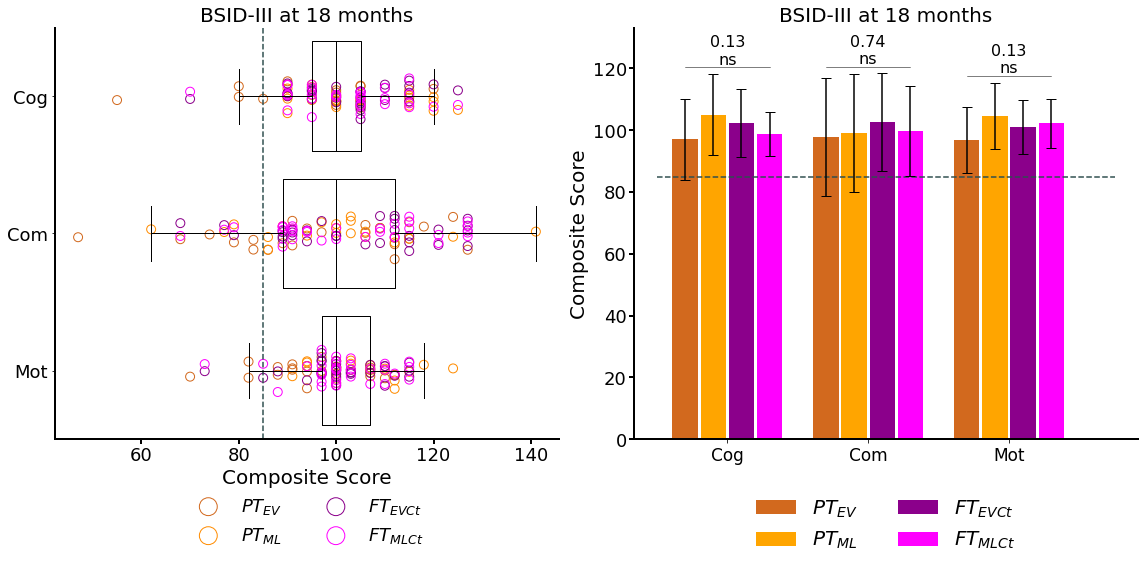

In [83]:
#sns.set_style('white')
#sns.set_context('paper')
fig, axs = plt.subplots(1,2, figsize=(16,8))

### Groups3GA == control, extreme, moderate: labels 1: extreme preterm 2: moderate preterm 3: control
#### subplot 1 is a box plot 

for i, composite in enumerate(['Cognitive_CompositeS', 'Communication_CompositeS', 'Motor_CompositeS'][::-1]):
    axs[0].boxplot(outcomes[composite].values, positions=[i],
                vert=False, widths = 0.8, showfliers=False,
                  medianprops = dict(color = 'black'))

    for g in ['extreme', 'moderate', 'extreme_control','moderate_control']:
        if g == 'extreme':
            label = 1
            color = 'chocolate'
            group_name = '$PT_{EV}$'
        elif g == 'moderate':
            label = 2
            color= 'darkorange'    
            group_name = '$PT_{ML}$'
        elif g == 'extreme_control':
            label = 3
            color = 'darkmagenta'
            group_name = '$FT_{EVCt}$'
        else: 
            color = 'magenta'
            group_name = '$FT_{MLCt}$'
            
        ix = outcomes[outcomes['GAgroups4'] == label][composite].values
        y = np.random.normal(i, 0.06, size=len(ix))
        
        if i == 0:
            axs[0].scatter( ix, y, marker= 'o', s=80,
                    facecolors='none', edgecolors = color,
                    label = group_name)
        else: 
            axs[0].scatter( ix, y, marker= 'o', s=80,
                    facecolors='none', edgecolors = color)
            
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=18, frameon=False, markerscale=2)

axs[0].set_yticks([0,1,2])
axs[0].set_yticklabels(['Cog', 'Com', 'Mot'][::-1], fontsize=18)


axs[0].set_xlabel('Composite Score', fontsize=20)
axs[0].set_title('BSID-III at 18 months', fontsize=20)

# Hide the right and top spines
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs[0].spines[axis].set_linewidth(2)

axs[0].tick_params(axis='x', labelsize=18)    
plt.setp(axs[0].xaxis.get_ticklines(), 'markeredgewidth', 2)
plt.setp(axs[0].xaxis.get_ticklines(), 'markersize', 5)

axs[0].vlines( 85, -0.5, 2.5, color='darkslategray', linestyles='dashed')
axs[1].hlines( 85, -0.5, 2.75, color='darkslategray', linestyles='dashed')

### subplot 2 is a bar plot comparing the groups 

pvals = []
max_h = []
for i, composite in enumerate(['Motor_CompositeS', 'Communication_CompositeS', 'Cognitive_CompositeS' ][::-1]):

    if i == 0:
        # extreme        
        ix = outcomes[outcomes['GAgroups4'] == 1][composite].values
        std = np.std(ix)
        axs[1].bar(x = i-0.3, height = np.mean(ix), width=0.18, yerr=std, capsize=5,
                   color='chocolate', label = '$PT_{EV}$')
        
        # moderate       
        ix2 = outcomes[outcomes['GAgroups4'] == 2][composite].values
        std2 = np.std(ix)
        axs[1].bar(x = i-0.1, height = np.mean(ix2), width=0.18, yerr=std2, capsize=5,
                   color='orange', label = '$PT_{ML}$')
        
        
        # control extreme
        ix3 = outcomes[outcomes['GAgroups4'] == 3][composite].values
        std3 = np.std(ix3)
        axs[1].bar(x = i+0.1, height =  np.mean(ix3),width=0.18, yerr=std3, capsize=5,
                   color='darkmagenta', label = '$FT_{EVCt}$')
        
        # control ,pderate
        ix4 = outcomes[outcomes['GAgroups4'] == 4][composite].values
        std4 = np.std(ix4)
        axs[1].bar(x = i+0.3, height =  np.mean(ix4),width=0.18, yerr=std4, capsize=5,
                   color='magenta', label = '$FT_{MLCt}$')
        
        sc_test = f_oneway(ix, ix2, ix3, ix4)
        pvals.append(sc_test.pvalue)
        #if sc_test.pvalue < 0.05:

        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
    else: 
         # extreme        
        ix = outcomes[outcomes['GAgroups4'] == 1][composite].values
        std = np.std(ix)
        axs[1].bar(x = i-0.3, height = np.mean(ix), width=0.18, yerr=std, capsize=5,
                   color='chocolate')
        
        # moderate       
        ix2 = outcomes[outcomes['GAgroups4'] == 2][composite].values
        std2 = np.std(ix)
        axs[1].bar(x = i-0.1, height = np.mean(ix2), width=0.18, yerr=std2, capsize=5,
                   color='orange')
        
        # control exttreme
        ix3 = outcomes[outcomes['GAgroups4'] == 3][composite].values
        std3 = np.std(ix3)
        axs[1].bar(x = i+0.1, height =  np.mean(ix3),width=0.18, yerr=std3, capsize=5,
                   color='darkmagenta')
        
        # control moderate
        ix4 = outcomes[outcomes['GAgroups4'] == 4][composite].values
        std4 = np.std(ix4)
        axs[1].bar(x = i+0.3, height =  np.mean(ix4),width=0.18, yerr=std4, capsize=5,
                   color='magenta')
 
        sc_test = f_oneway(ix, ix2, ix3, ix4)
        pvals.append(sc_test.pvalue)
        #if sc_test.pvalue < 0.05:
            
            
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
#axs[1].autoscale(tight=True)

axs[1].set_xticks(np.array(range(3)))
#axs[1].set_xticklabels( ('Motor', 'Communication', 'Cognitive'), fontsize=17 )
axs[1].set_xticklabels( ('Cog', 'Com', 'Mot'), fontsize=17 )
axs[1].set_ylabel('Composite Score', fontsize=20)

a, pvals_corr= pg.multicomp(pvals, method='fdr_bh')
notation = get_notation(pvals=pvals_corr)
for i, txt in enumerate(notation):
    x1,x2 =  i-0.3, i+0.3          
    y, h, col = max_h[i] * 1.02 , 0.0001, 'k'
    axs[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    axs[1].text((x1+x2)*.5, y+h, txt, fontsize=16,
                ha='center', va='bottom', color=col)
    

# Hide the right and top spines
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs[1].spines[axis].set_linewidth(2)

axs[1].tick_params(axis='y', labelsize=18)    
plt.setp(axs[1].yaxis.get_ticklines(), 'markeredgewidth', 2)
plt.setp(axs[1].yaxis.get_ticklines(), 'markersize', 5)
axs[1].set_title('BSID-III at 18 months', fontsize=20)

axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=20, frameon=False, markerscale=0.8)
axs[1].set_ylim([0,max(max_h)+15])

plt.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig('../../Results/figures/Bayley_distribution_composite_4subgroups.png', dpi=300)
plt.show()

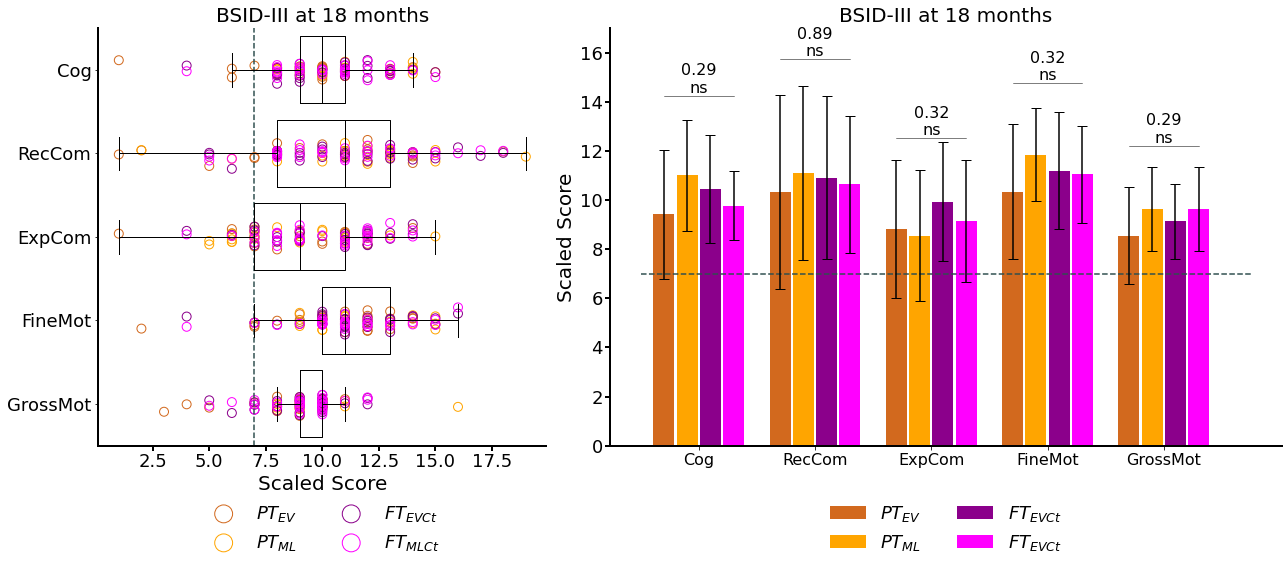

In [82]:
#sns.set_style('white')
#sns.set_context('paper')
fig, axs = plt.subplots(1,2, figsize=(18,8), gridspec_kw={'width_ratios': [2, 3]})

#### subplot 1 is a box plot 

#for i, composite in enumerate(['Cognitive_ScaledS', 'ReceptiveCom_ScaledS', 'ExpressiveCom_ScaledS', 'FineMot_ScaledS','GrossMot_ScaledS' ]):
for i, composite in enumerate(['Cognitive_ScaledS', 'ReceptiveCom_ScaledS', 'ExpressiveCom_ScaledS', 'FineMot_ScaledS','GrossMot_ScaledS' ][::-1]):
 
    axs[0].boxplot(outcomes[composite].values, positions=[i],
                vert=False, widths = 0.8, showfliers=False,
                  medianprops = dict(color = 'black'))

    for g in ['extreme', 'moderate', 'extreme_control', 'moderate_control']:
        if g == 'extreme':
            label = 1
            color = 'chocolate'
            group_name = '$PT_{EV}$'
        elif g == 'moderate':
            label = 2
            color= 'orange' 
            group_name = '$PT_{ML}$'
        elif g == 'extreme_control':
            label = 3
            color = 'darkmagenta'
            group_name = '$FT_{EVCt}$'
        else: 
            color = 'magenta'
            group_name = '$FT_{MLCt}$'
            
        ix = outcomes[outcomes['GAgroups4'] == label][composite].values
        y = np.random.normal(i, 0.06, size=len(ix))
        
        if i == 0:
            axs[0].scatter( ix, y, marker= 'o', s=80,
                    facecolors='none', edgecolors = color,
                    label = group_name)
        else: 
            axs[0].scatter( ix, y, marker= 'o', s=80,
                    facecolors='none', edgecolors = color)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=18, frameon=False, markerscale=2)

axs[0].set_yticks([0,1,2,3,4])
#axs[0].set_yticklabels(['Cognitive', 'Receptive Com.', 'Expressive Com.', 'Fine Motor', 'Gross Motor'], fontsize=18)
axs[0].set_yticklabels(['Cog', 'RecCom', 'ExpCom', 'FineMot', 'GrossMot'][::-1], fontsize=18)


axs[0].set_xlabel('Scaled Score', fontsize=20)
axs[0].set_title('BSID-III at 18 months', fontsize=20)

# Hide the right and top spines
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs[0].spines[axis].set_linewidth(2)

axs[0].tick_params(axis='x', labelsize=18)    
plt.setp(axs[0].xaxis.get_ticklines(), 'markeredgewidth', 2)
plt.setp(axs[0].xaxis.get_ticklines(), 'markersize', 5)

axs[0].vlines( 7, -0.5, 4.5, color='darkslategray', linestyles='dashed')
axs[1].hlines( 7, -0.5, 4.75, color='darkslategray', linestyles='dashed')



### subplot 2 is a bar plot comparing the groups 

pvals = []
max_h = []
#for i, composite in enumerate(['Cognitive_ScaledS', 'ReceptiveCom_ScaledS', 'ExpressiveCom_ScaledS', 'FineMot_ScaledS','GrossMot_ScaledS' ][::-1]):
for i, composite in enumerate(['Cognitive_ScaledS', 'ReceptiveCom_ScaledS', 'ExpressiveCom_ScaledS', 'FineMot_ScaledS','GrossMot_ScaledS' ]):

    if i == 0:
        # extreme         
        ix = outcomes[outcomes['GAgroups4'] == 1][composite].values
        std = np.std(ix)
        axs[1].bar(x = i-0.3, height = np.mean(ix), width=0.18, yerr=std, capsize=5,
                   color='chocolate', label = '$PT_{EV}$')
        # moderate 
        ix2 = outcomes[outcomes['GAgroups4'] == 2][composite].values
        std2 = np.std(ix2)
        axs[1].bar(x = i-0.1, height =  np.mean(ix2),width=0.18, yerr=std2, capsize=5,
                   color='orange', label = '$PT_{ML}$')
        
        # control
        ix3 = outcomes[outcomes['GAgroups4'] == 3][composite].values
        std3 = np.std(ix3)
        axs[1].bar(x = i+0.1, height =  np.mean(ix3),width=0.18, yerr=std3, capsize=5,
                   color='darkmagenta', label = '$FT_{EVCt}$')
        
        # control
        ix4 = outcomes[outcomes['GAgroups4'] == 4][composite].values
        std4 = np.std(ix4)
        axs[1].bar(x = i+0.3, height =  np.mean(ix4),width=0.18, yerr=std4, capsize=5,
                   color='magenta', label = '$FT_{EVCt}$')
        
        sc_test = f_oneway(ix, ix2, ix3, ix4)
        pvals.append(sc_test.pvalue)
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
    else: 
        # extreme         
        ix = outcomes[outcomes['GAgroups4'] == 1][composite].values
        std = np.std(ix)
        axs[1].bar(x = i-0.3, height = np.mean(ix), width=0.18, yerr=std, capsize=5,
                   color='chocolate')
        # moderate 
        ix2 = outcomes[outcomes['GAgroups4'] == 2][composite].values
        std2 = np.std(ix2)
        axs[1].bar(x = i-0.1, height =  np.mean(ix2),width=0.18, yerr=std2, capsize=5,
                   color='orange')
        
        # control moderate
        ix3 = outcomes[outcomes['GAgroups4'] == 3][composite].values
        std3 = np.std(ix3)
        axs[1].bar(x = i+0.1, height =  np.mean(ix3),width=0.18, yerr=std3, capsize=5,
                   color='darkmagenta')
        
        # control moderate
        ix4 = outcomes[outcomes['GAgroups4'] == 4][composite].values
        std4 = np.std(ix4)
        axs[1].bar(x = i+0.3, height =  np.mean(ix4),width=0.18, yerr=std4, capsize=5,
                   color='magenta')
 
        sc_test = f_oneway(ix, ix2, ix3, ix4)
        pvals.append(sc_test.pvalue)
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
#axs[1].autoscale(tight=True)

axs[1].set_xticks(np.array(range(5)))#+.1)
#axs[1].set_xticklabels( list(['Cognitive', 'Recep. Com.', 'Express. Com.', 'Fine Motor', 'Gross Motor'][::-1]), fontsize=16)#, rotation=45 )
axs[1].set_xticklabels( list(['Cog', 'RecCom', 'ExpCom', 'FineMot', 'GrossMot']), fontsize=16)#, rotation=45 )
axs[1].set_ylabel('Scaled Score', fontsize=20)

a, pvals_corr= pg.multicomp(pvals, method='fdr_bh')
notation = get_notation(pvals=pvals_corr)
for i, txt in enumerate(notation):
    x1,x2 =  i-0.3, i+0.3          
    y, h, col = max_h[i] * 1.075 , 0.0001, 'k'
    axs[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    axs[1].text((x1+x2)*.5, y+h, txt, fontsize=16,
                ha='center', va='bottom', color=col)
    

# Hide the right and top spines
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs[1].spines[axis].set_linewidth(2)

axs[1].tick_params(axis='y', labelsize=18)    
plt.setp(axs[1].yaxis.get_ticklines(), 'markeredgewidth', 2)
plt.setp(axs[1].yaxis.get_ticklines(), 'markersize', 5)
axs[1].set_title('BSID-III at 18 months', fontsize=20)

axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=18, frameon=False, markerscale=0.8)
axs[1].set_ylim([0,int(max(max_h)+3)])


plt.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig('../../Results/figures/Bayley_distribution_scaled_4subgroups.png', dpi=300)
plt.show()

# Merging the subplots 

## 2 groups

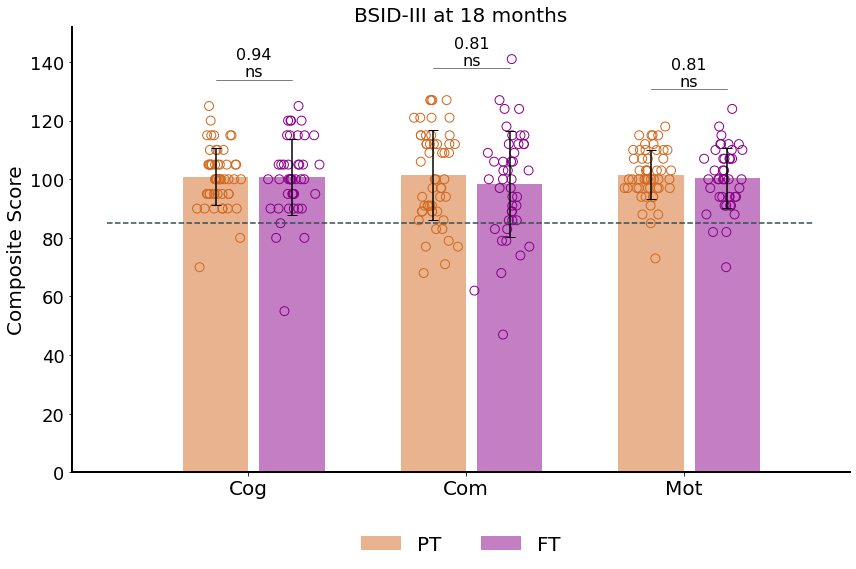

In [93]:
#for i, composite in enumerate([ 'Motor_CompositeS','Communication_CompositeS', 'Cognitive_CompositeS']):
fig, ax = plt.subplots(figsize=(12,8))

pvals = []
max_h = []
#for i, composite in enumerate(['Motor_CompositeS', 'Communication_CompositeS', 'Cognitive_CompositeS', ]):
for i, composite in enumerate(['Cognitive_CompositeS', 'Communication_CompositeS', 'Motor_CompositeS']):
    if i == 0:
        # preterm         
        ix = outcomes[outcomes['Group(PT_FT)'] == 0][composite].values
        std = np.std(ix)
        plt.bar(x = i, height = np.mean(ix), width=0.3, yerr=std, capsize=5,
                   color='chocolate', label = 'PT', alpha=0.5)
        # control 
        ix2 = outcomes[outcomes['Group(PT_FT)'] == 1][composite].values
        std2 = np.std(ix2)
        plt.bar(x = i+0.35, height =  np.mean(ix2),width=0.3, yerr=std2, capsize=5,
                   color='darkmagenta', label = 'FT', alpha=0.5)
        
        test = pg.ttest(ix, ix2)
        p = np.round(np.float32(test['p-val'].values[0]),2)
        pvals.append(p)
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
    else: 
        # preterm         
        ix = outcomes[outcomes['Group(PT_FT)'] == 0][composite].values
        std = np.std(ix)
        plt.bar(x = i, height =  np.mean(ix), width=0.3, yerr=std, capsize=5,
                   color='chocolate', alpha=0.5)
        # control 
        ix2 = outcomes[outcomes['Group(PT_FT)'] == 1][composite].values
        std2 = np.std(ix2)
        plt.bar(x = i+0.35, height =  np.mean(ix2),width=0.3, yerr=std2, capsize=5,
                   color='darkmagenta', alpha=0.5)
 
        test = pg.ttest(ix, ix2)
        p = np.round(np.float32(test['p-val'].values[0]),2)
        pvals.append(p)
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
#axs[1].autoscale(tight=True)

plt.xticks(np.array(range(3))+.15, ('Cog', 'Com', 'Mot'), fontsize=20)
#axs[1].set_xticklabels( ('Mot', 'Com', 'Cog'), fontsize=20 )
plt.ylabel('Composite Score', fontsize=20)

a, pvals_corr= pg.multicomp(pvals, method='fdr_bh')
notation = get_notation(pvals=pvals_corr)
for i, txt in enumerate(notation):
    x1,x2 =  i, i+0.35          
    y, h, col = max_h[i] * 1.18 , 0.0001, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.5, y+h, txt, fontsize=16,
                ha='center', va='bottom', color=col)
    
    
##### REAL VALUES 
for i, composite in enumerate([ 'Motor_CompositeS','Communication_CompositeS', 'Cognitive_CompositeS'][::-1]):
        
    ### preterm 
    group_name = 'PT'
    label=0
    color = 'chocolate'
    ix = outcomes[outcomes['Group(PT_FT)'] == label][composite].values
    y = np.random.normal(i, 0.05, size=len(ix))
    
    plt.scatter(  y,ix, marker= 'o', s=80,
                    facecolors='none', edgecolors = color)
    
    ### term 
    group_name = 'FT'
    label = 1
    color = 'darkmagenta'
    ix = outcomes[outcomes['Group(PT_FT)'] == label][composite].values
    y = np.random.normal(i+0.35, 0.05, size=len(ix))
    plt.scatter( y,ix, marker= 'o', s=80,
                    facecolors='none', edgecolors = color)

    

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.tick_params(axis='y', labelsize=18)    
#plt.setp(plt.yaxis.get_ticklines(), 'markeredgewidth', 2)
#plt.setp(plt.yaxis.get_ticklines(), 'markersize', 5)
plt.title('BSID-III at 18 months', fontsize=20)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=20, frameon=False, markerscale=0.8)
plt.ylim([0,max(max_h)+35])


#axs[0].vlines( 85, -0.5, 2.5, color='darkslategray', linestyles='dashed')
plt.hlines( 85, -0.5, 2.75, color='darkslategray', linestyles='dashed')

plt.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig('../../Results/figures/Bayley_distribution_composite_preterm_term_simplified.png', dpi=300)
plt.show() 

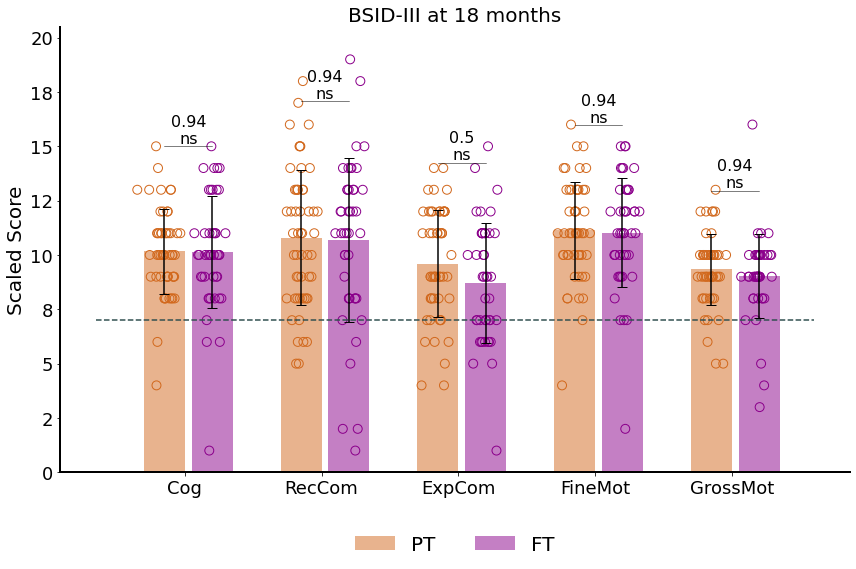

In [94]:
#for i, composite in enumerate([ 'Motor_CompositeS','Communication_CompositeS', 'Cognitive_CompositeS']):
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(figsize=(12,8))

pvals = []
max_h = []
#for i, composite in enumerate(['Motor_CompositeS', 'Communication_CompositeS', 'Cognitive_CompositeS', ]):
for i, composite in enumerate(['GrossMot_ScaledS', 'FineMot_ScaledS','ExpressiveCom_ScaledS', 'ReceptiveCom_ScaledS','Cognitive_ScaledS'][::-1]): 
    if i == 0:
        # preterm         
        ix = outcomes[outcomes['Group(PT_FT)'] == 0][composite].values
        std = np.std(ix)
        plt.bar(x = i, height = np.mean(ix), width=0.3, yerr=std, capsize=5,
                   color='chocolate', label = 'PT', alpha=0.5)
        # control 
        ix2 = outcomes[outcomes['Group(PT_FT)'] == 1][composite].values
        std2 = np.std(ix2)
        plt.bar(x = i+0.35, height =  np.mean(ix2),width=0.3, yerr=std2, capsize=5,
                   color='darkmagenta', label = 'FT', alpha=0.5)
        
        test = pg.ttest(ix, ix2)
        p = np.round(np.float32(test['p-val'].values[0]),2)
        pvals.append(p)
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
    else: 
        # preterm         
        ix = outcomes[outcomes['Group(PT_FT)'] == 0][composite].values
        std = np.std(ix)
        plt.bar(x = i, height =  np.mean(ix), width=0.3, yerr=std, capsize=5,
                   color='chocolate', alpha=0.5)
        # control 
        ix2 = outcomes[outcomes['Group(PT_FT)'] == 1][composite].values
        std2 = np.std(ix2)
        plt.bar(x = i+0.35, height =  np.mean(ix2),width=0.3, yerr=std2, capsize=5,
                   color='darkmagenta', alpha=0.5)
 
        test = pg.ttest(ix, ix2)
        p = np.round(np.float32(test['p-val'].values[0]),2)
        pvals.append(p)
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
#axs[1].autoscale(tight=True)


plt.xticks(np.array(range(5))+.15,['GrossMot', 'FineMot', 'ExpCom', 'RecCom', 'Cog'][::-1], fontsize=18)


plt.ylabel('Scaled Score', fontsize=20)

a, pvals_corr= pg.multicomp(pvals, method='fdr_bh')
notation = get_notation(pvals=pvals_corr)
for i, txt in enumerate(notation):
    x1,x2 =  i, i+0.35          
    y, h, col = max_h[i] * 1.18 , 0.0001, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.5, y+h, txt, fontsize=16,
                ha='center', va='bottom', color=col)
    
    
##### REAL VALUES 
for i, composite in enumerate(['GrossMot_ScaledS', 'FineMot_ScaledS','ExpressiveCom_ScaledS', 'ReceptiveCom_ScaledS','Cognitive_ScaledS'][::-1]): 
        
    ### preterm 
    group_name = 'PT'
    label=0
    color = 'chocolate'
    ix = outcomes[outcomes['Group(PT_FT)'] == label][composite].values
    y = np.random.normal(i, 0.05, size=len(ix))
    
    plt.scatter(  y,ix, marker= 'o', s=80,
                    facecolors='none', edgecolors = color)
    
    ### term 
    group_name = 'FT'
    label = 1
    color = 'darkmagenta'
    ix = outcomes[outcomes['Group(PT_FT)'] == label][composite].values
    y = np.random.normal(i+0.35, 0.05, size=len(ix))
    plt.scatter( y,ix, marker= 'o', s=80,
                    facecolors='none', edgecolors = color)

    

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.tick_params(axis='y', labelsize=18)    
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#plt.setp(plt.yaxis.get_ticklines(), 'markeredgewidth', 2)
#plt.setp(plt.yaxis.get_ticklines(), 'markersize', 5)
plt.title('BSID-III at 18 months', fontsize=20)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=20, frameon=False, markerscale=0.8)
plt.ylim([0,max(max_h)+6])


#axs[0].vlines( 85, -0.5, 2.5, color='darkslategray', linestyles='dashed')
plt.hlines( 7, -0.5, 4.75, color='darkslategray', linestyles='dashed')

plt.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig('../../Results/figures/Bayley_distribution_scaled_preterm_term_simplified.png', dpi=300)
plt.show() 

## 4 groups

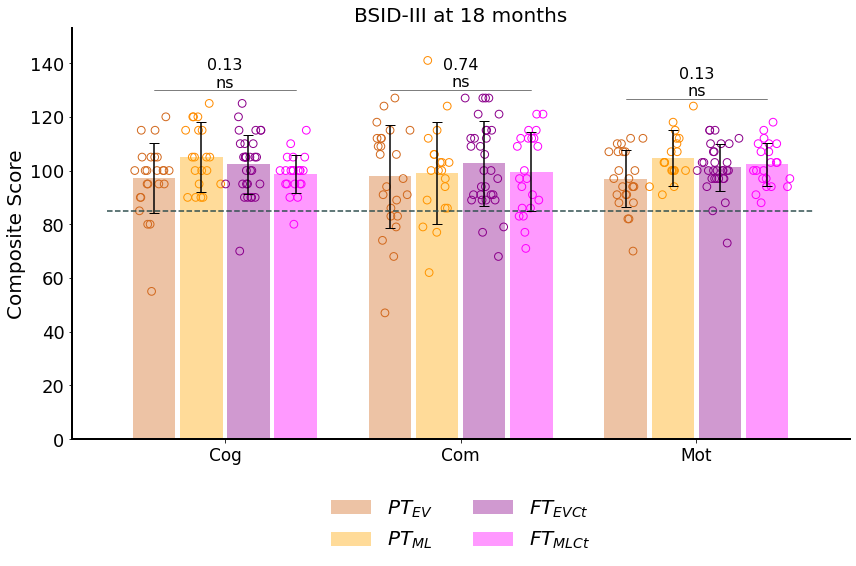

In [95]:
from scipy.stats import f_oneway, tukeylambda

#sns.set_style('white')
#sns.set_context('paper')
fig, axs = plt.subplots( figsize=(12,8))

### 
#### barplot 
pvals = []
max_h = []
for i, composite in enumerate(['Motor_CompositeS', 'Communication_CompositeS', 'Cognitive_CompositeS' ][::-1]):

    if i == 0:
        # extreme        
        ix = outcomes[outcomes['GAgroups4'] == 1][composite].values
        std = np.std(ix)
        plt.bar(x = i-0.3, height = np.mean(ix), width=0.18, yerr=std, capsize=5, alpha=0.4,
                   color='chocolate', label = '$PT_{EV}$')
        
        # moderate       
        ix2 = outcomes[outcomes['GAgroups4'] == 2][composite].values
        std2 = np.std(ix)
        plt.bar(x = i-0.1, height = np.mean(ix2), width=0.18, yerr=std2, capsize=5,alpha=0.4,
                   color='orange', label = '$PT_{ML}$')
        
        
        # control extreme
        ix3 = outcomes[outcomes['GAgroups4'] == 3][composite].values
        std3 = np.std(ix3)
        plt.bar(x = i+0.1, height =  np.mean(ix3),width=0.18, yerr=std3, capsize=5,alpha=0.4,
                   color='darkmagenta', label = '$FT_{EVCt}$')
        
        # control ,pderate
        ix4 = outcomes[outcomes['GAgroups4'] == 4][composite].values
        std4 = np.std(ix4)
        plt.bar(x = i+0.3, height =  np.mean(ix4),width=0.18, yerr=std4, capsize=5,alpha=0.4,
                   color='magenta', label = '$FT_{MLCt}$')
        
        sc_test = f_oneway(ix, ix2, ix3, ix4)
        pvals.append(sc_test.pvalue)
        #if sc_test.pvalue < 0.05:

        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
    else: 
         # extreme        
        ix = outcomes[outcomes['GAgroups4'] == 1][composite].values
        std = np.std(ix)
        plt.bar(x = i-0.3, height = np.mean(ix), width=0.18, yerr=std, capsize=5,alpha=0.4,
                   color='chocolate')
        
        # moderate       
        ix2 = outcomes[outcomes['GAgroups4'] == 2][composite].values
        std2 = np.std(ix)
        plt.bar(x = i-0.1, height = np.mean(ix2), width=0.18, yerr=std2, capsize=5,alpha=0.4,
                   color='orange')
        
        # control exttreme
        ix3 = outcomes[outcomes['GAgroups4'] == 3][composite].values
        std3 = np.std(ix3)
        plt.bar(x = i+0.1, height =  np.mean(ix3),width=0.18, yerr=std3, capsize=5,alpha=0.4,
                   color='darkmagenta')
        
        # control moderate
        ix4 = outcomes[outcomes['GAgroups4'] == 4][composite].values
        std4 = np.std(ix4)
        plt.bar(x = i+0.3, height =  np.mean(ix4),width=0.18, yerr=std4, capsize=5,alpha=0.4,
                   color='magenta')
 
        sc_test = f_oneway(ix, ix2, ix3, ix4)
        pvals.append(sc_test.pvalue)
        #if sc_test.pvalue < 0.05:
            
            
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
#axs[1].autoscale(tight=True)

plt.xticks(np.array(range(3)),('Cog', 'Com', 'Mot'), fontsize=17)
plt.ylabel('Composite Score', fontsize=20)

a, pvals_corr= pg.multicomp(pvals, method='fdr_bh')
notation = get_notation(pvals=pvals_corr)
for i, txt in enumerate(notation):
    x1,x2 =  i-0.3, i+0.3          
    y, h, col = max_h[i] * 1.1 , 0.0001, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.5, y+h, txt, fontsize=16,
                ha='center', va='bottom', color=col)
    
    
################# RAW VALUES 
for i, composite in enumerate(['Cognitive_CompositeS', 'Communication_CompositeS', 'Motor_CompositeS']):
    for label, position in zip([1,2,3,4], [-0.3,-0.1,0.1,0.3]):
        if label == 1:
            ## extreme 
            color = 'chocolate'
            group_name = '$PT_{EV}$'

        elif label ==2:
            color= 'darkorange'    
            group_name = '$PT_{ML}$'

        elif label == 3:
            ## extreme control
            color = 'darkmagenta'
            group_name = '$FT_{EVCt}$'
        else:
            ## moderate control 
            label=4
            color = 'magenta'
            group_name = '$FT_{MLCt}$'
            
        ix = outcomes[outcomes['GAgroups4'] == label][composite].values
        y = np.random.normal(i+position, 0.035, size=len(ix))
        
        plt.scatter(  y,ix, marker= 'o', s=60,
                    facecolors='none', edgecolors = color)


# Hide the right and top spines
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs.spines[axis].set_linewidth(2)

plt.tick_params(axis='y', labelsize=18)    
#plt.setp(axs[1].yaxis.get_ticklines(), 'markeredgewidth', 2)
#plt.setp(axs[1].yaxis.get_ticklines(), 'markersize', 5)
plt.title('BSID-III at 18 months', fontsize=20)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=20, frameon=False, markerscale=0.8)
plt.ylim([0,max(max_h)+35])
plt.hlines( 85, -0.5, 2.5, color='darkslategray', linestyles='dashed')
plt.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig('../../Results/figures/Bayley_distribution_composite_4subgroups_simplified.png', dpi=300)
plt.show()


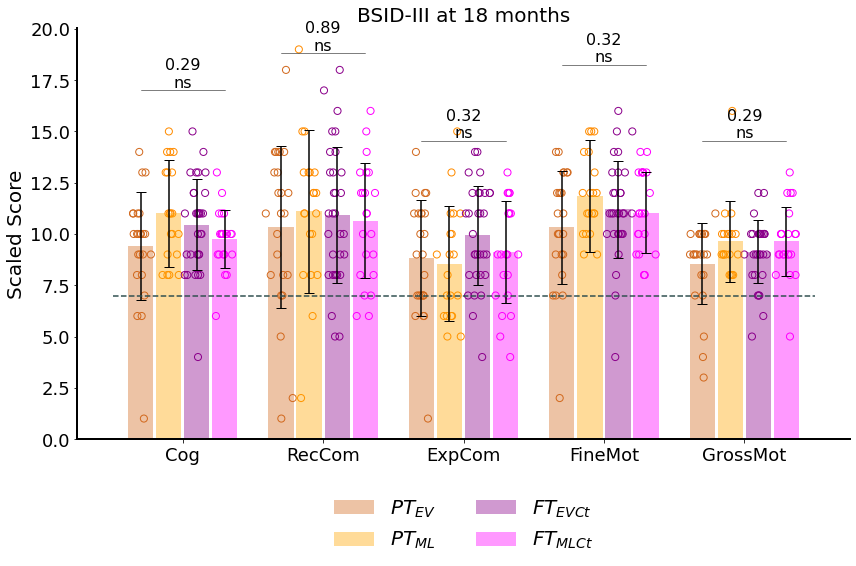

In [97]:

#sns.set_style('white')
#sns.set_context('paper')
fig, axs = plt.subplots( figsize=(12,8))

### 
#### barplot 
pvals = []
max_h = []
for i, composite in enumerate(['GrossMot_ScaledS', 'FineMot_ScaledS','ExpressiveCom_ScaledS', 'ReceptiveCom_ScaledS','Cognitive_ScaledS'][::-1]): 

    if i == 0:
        # extreme        
        ix = outcomes[outcomes['GAgroups4'] == 1][composite].values
        std = np.std(ix)
        plt.bar(x = i-0.3, height = np.mean(ix), width=0.18, yerr=std, capsize=5, alpha=0.4,
                   color='chocolate', label = '$PT_{EV}$')
        
        # moderate       
        ix2 = outcomes[outcomes['GAgroups4'] == 2][composite].values
        std2 = np.std(ix)
        plt.bar(x = i-0.1, height = np.mean(ix2), width=0.18, yerr=std2, capsize=5,alpha=0.4,
                   color='orange', label = '$PT_{ML}$')
        
        
        # control extreme
        ix3 = outcomes[outcomes['GAgroups4'] == 3][composite].values
        std3 = np.std(ix3)
        plt.bar(x = i+0.1, height =  np.mean(ix3),width=0.18, yerr=std3, capsize=5,alpha=0.4,
                   color='darkmagenta', label = '$FT_{EVCt}$')
        
        # control ,pderate
        ix4 = outcomes[outcomes['GAgroups4'] == 4][composite].values
        std4 = np.std(ix4)
        plt.bar(x = i+0.3, height =  np.mean(ix4),width=0.18, yerr=std4, capsize=5,alpha=0.4,
                   color='magenta', label = '$FT_{MLCt}$')
        
        sc_test = f_oneway(ix, ix2, ix3, ix4)
        pvals.append(sc_test.pvalue)
        #if sc_test.pvalue < 0.05:

        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
    else: 
         # extreme        
        ix = outcomes[outcomes['GAgroups4'] == 1][composite].values
        std = np.std(ix)
        plt.bar(x = i-0.3, height = np.mean(ix), width=0.18, yerr=std, capsize=5,alpha=0.4,
                   color='chocolate')
        
        # moderate       
        ix2 = outcomes[outcomes['GAgroups4'] == 2][composite].values
        std2 = np.std(ix)
        plt.bar(x = i-0.1, height = np.mean(ix2), width=0.18, yerr=std2, capsize=5,alpha=0.4,
                   color='orange')
        
        # control exttreme
        ix3 = outcomes[outcomes['GAgroups4'] == 3][composite].values
        std3 = np.std(ix3)
        plt.bar(x = i+0.1, height =  np.mean(ix3),width=0.18, yerr=std3, capsize=5,alpha=0.4,
                   color='darkmagenta')
        
        # control moderate
        ix4 = outcomes[outcomes['GAgroups4'] == 4][composite].values
        std4 = np.std(ix4)
        plt.bar(x = i+0.3, height =  np.mean(ix4),width=0.18, yerr=std4, capsize=5,alpha=0.4,
                   color='magenta')
 
        sc_test = f_oneway(ix, ix2, ix3, ix4)
        pvals.append(sc_test.pvalue)
        #if sc_test.pvalue < 0.05:
            
            
        max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
#axs[1].autoscale(tight=True)

plt.xticks(np.array(range(5)),['GrossMot', 'FineMot', 'ExpCom', 'RecCom', 'Cog'][::-1], fontsize=18)

plt.ylabel('Scaled Score', fontsize=20)

a, pvals_corr= pg.multicomp(pvals, method='fdr_bh')
notation = get_notation(pvals=pvals_corr)
for i, txt in enumerate(notation):
    x1,x2 =  i-0.3, i+0.3          
    y, h, col = max_h[i] * 1.25 , 0.0001, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.5, y+h, txt, fontsize=16,
                ha='center', va='bottom', color=col)
    
    
################# RAW VALUES 
for i, composite in enumerate(['GrossMot_ScaledS', 'FineMot_ScaledS','ExpressiveCom_ScaledS', 'ReceptiveCom_ScaledS','Cognitive_ScaledS'][::-1]): 
    for label, position in zip([1,2,3,4], [-0.3,-0.1,0.1,0.3]):
        if label == 1:
            ## extreme 
            color = 'chocolate'
            group_name = '$PT_{EV}$'

        elif label ==2:
            color= 'darkorange'    
            group_name = '$PT_{ML}$'

        elif label == 3:
            ## extreme control
            color = 'darkmagenta'
            group_name = '$FT_{EVCt}$'
        else:
            ## moderate control 
            label=4
            color = 'magenta'
            group_name = '$FT_{MLCt}$'
            
        ix = outcomes[outcomes['GAgroups4'] == label][composite].values
        y = np.random.normal(i+position, 0.035, size=len(ix))
        
        plt.scatter(  y,ix, marker= 'o', s=50,
                    facecolors='none', edgecolors = color)


# Hide the right and top spines
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs.spines[axis].set_linewidth(2)

plt.tick_params(axis='y', labelsize=18) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.hlines( 7, -0.5, 4.5, color='darkslategray', linestyles='dashed')

#plt.setp(axs[1].yaxis.get_ticklines(), 'markeredgewidth', 2)
#plt.setp(axs[1].yaxis.get_ticklines(), 'markersize', 5)
plt.title('BSID-III at 18 months', fontsize=20)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=20, frameon=False, markerscale=0.8)
plt.ylim([0,max(max_h)+5])

plt.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig('../../Results/figures/Bayley_distribution_scaled_4subgroups_simplified.png', dpi=300)
plt.show()
